In [1]:
#r "nuget: APSToolkit, 1.0.5"

Installed Packages APSToolkit, 1.0.5

Loading extensions from `C:\Users\vho2\.nuget\packages\microsoft.data.analysis\0.21.1\interactive-extensions\dotnet\Microsoft.Data.Analysis.Interactive.dll`

In [2]:
using APSToolkit;
using Autodesk.Forge;
using APSToolkit.Database;

## Auth

In [3]:
using APSToolkit.Auth;
var token = Authentication.Get2LeggedToken().Result;

In [4]:
// please visit tutorial : 03.Explore Versions Item and Derivative Urn to get the urn
string urn = "dXJuOmFkc2sud2lwcHJvZDpmcy5maWxlOnZmLk9kOHR4RGJLU1NlbFRvVmcxb2MxVkE_dmVyc2lvbj0z";

## Database Reader

Tutorial : 
- https://github.com/petrbroz/forge-props-service
- https://aps.autodesk.com/blog/accessing-design-metadata-without-viewer

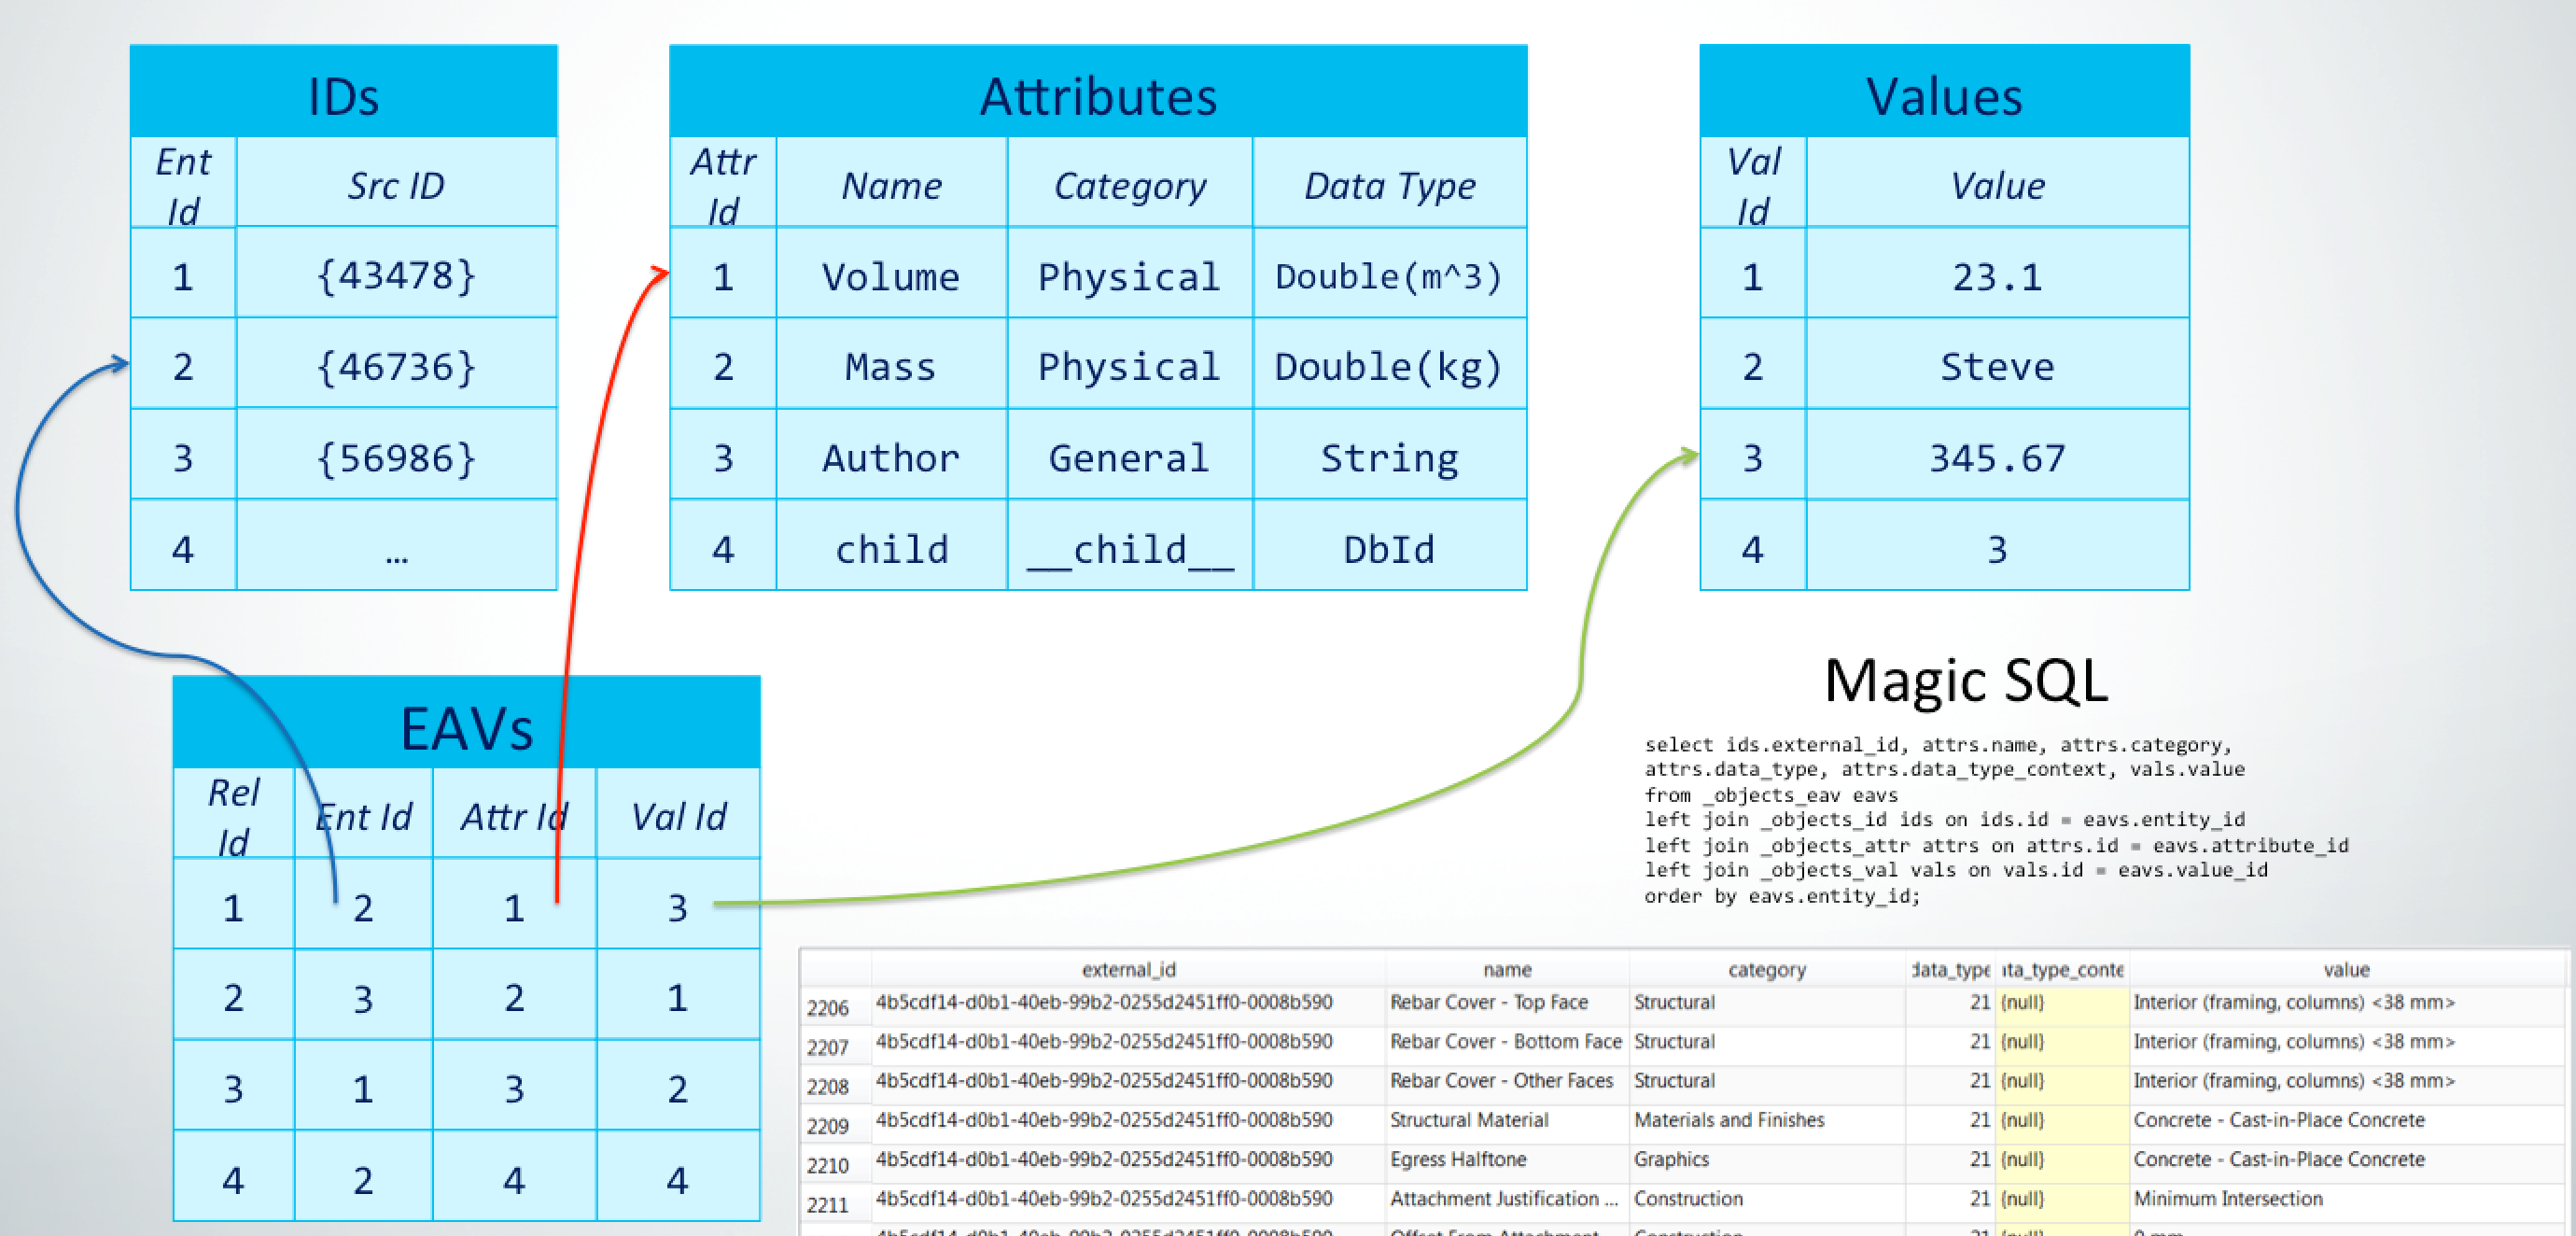

In [5]:
var DbReader = new DbReader(urn, token);

#### Read Query Database ElementId

In [6]:
using System.Data;
using APSToolkit.Utils;
string sqlQuery = @"
            SELECT _objects_id.id AS dbId, _objects_id.external_id AS externalId, 
                   _objects_attr.name AS name,_objects_attr.display_name AS propName , 
                   _objects_val.value AS propValue
            FROM _objects_eav
                INNER JOIN _objects_id ON _objects_eav.entity_id = _objects_id.id
                INNER JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
                INNER JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
            WHERE name = 'ElementId'
            ";
// update for get
DataTable dataTable = DbReader.ExecuteQuery(sqlQuery);


In [13]:
var df = dataTable.ToDataFrame();
df.Head(5)

index,dbId,externalId,name,propName,propValue
0,40,9693c920-050e-4443-9b38-2491295576d1-00000000,ElementId,<null>,0
1,42,9693c920-050e-4443-9b38-2491295576d1-00000001,ElementId,<null>,1
2,43,9693c920-050e-4443-9b38-2491295576d1-00000002,ElementId,<null>,2
3,44,9693c920-050e-4443-9b38-2491295576d1-00000003,ElementId,<null>,3
4,45,9693c920-050e-4443-9b38-2491295576d1-00000004,ElementId,<null>,4


#### Read Query Database By ExternalId

In [17]:
string sqlQuery = $@"
        SELECT _objects_id.id AS dbId, _objects_id.external_id AS externalId, 
                _objects_attr.name AS name,_objects_attr.display_name AS propName , 
                _objects_val.value AS propValue
        FROM _objects_eav
            INNER JOIN _objects_id ON _objects_eav.entity_id = _objects_id.id
            INNER JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
            INNER JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
        WHERE externalId = '5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe'
        ";
    // update for get
DataTable dataTable = DbReader.ExecuteQuery(sqlQuery);
var df = dataTable.ToDataFrame();
df.Head(10)

index,dbId,externalId,name,propName,propValue
0,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,ElementId,<null>,289790
1,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,name,<null>,Seating-LAMMHULTS-PENNE-Chair [289790]
2,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,Category,<null>,Revit Furniture
3,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,CategoryId,<null>,-2000080
4,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,parent,<null>,3527
5,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,instanceof_objid,<null>,3526
6,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,Level,<null>,2
7,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,IFC Predefined Type,IFC Predefined Type,
8,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,Export to IFC As,Export to IFC As,
9,3528,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,Export to IFC,Export to IFC,By Type


#### Get All Public Property

In [18]:
string sqlQuery = $@"
      SELECT ids.id AS dbid, attrs.category AS category, COALESCE(NULLIF(attrs.display_name, ''), 
      attrs.name) AS name, vals.value AS value
   FROM _objects_eav eav
   LEFT JOIN _objects_id ids ON ids.id = eav.entity_id
   LEFT JOIN _objects_attr attrs ON attrs.id = eav.attribute_id
   LEFT JOIN _objects_val vals on vals.id = eav.value_id
   WHERE category NOT LIKE '\_\_%\_\_' ESCAPE '\' /* skip internal properties */
   ORDER BY dbid
   ";
// update for get
DataTable dataTable = DbReader.ExecuteQuery(sqlQuery);
var df = dataTable.ToDataFrame();
df.Head(10)

index,dbid,category,name,value
0,1,Identity Data,Organization Name,
1,1,Identity Data,Organization Description,
2,1,Identity Data,Building Name,
3,1,Identity Data,Author,
4,1,IFC Parameters,IfcSite GUID,
5,1,IFC Parameters,IfcBuilding GUID,
6,1,IFC Parameters,IfcProject GUID,
7,1,Other,Project Issue Date,Issue Date
8,1,Other,Project Status,Project Status
9,1,Other,Client Name,Owner


#### Read Query Database By Revit Category

In [19]:
string sqlQuery = @"
    SELECT _objects_id.id AS dbId, _objects_id.external_id AS externalId,
            _objects_attr.name AS name,_objects_attr.display_name AS propName , 
            _objects_val.value AS propValue
    FROM _objects_eav
        INNER JOIN _objects_id ON _objects_eav.entity_id = _objects_id.id
        INNER JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
        INNER JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
    WHERE name LIKE '_RC' ESCAPE '\'
    ";
// update for get
DataTable dataTable = DbReader.ExecuteQuery(sqlQuery);
var df = dataTable.ToDataFrame();
df.Head(10)

index,dbId,externalId,name,propName,propValue
0,39,d8cf3969-91e1-4648-a9c0-45deeef5dff9,_RC,<null>,Phases
1,41,0d061783-df47-49d5-8ccd-a463a00d457c,_RC,<null>,
2,65,82a5a7ff-fc3b-42ab-8d94-5372b6a7b9d4,_RC,<null>,Materials
3,355,50a85c90-2825-431d-bc64-44a48a595e72,_RC,<null>,
4,357,651f74a4-dabf-4e7b-b098-519982136a2b-00008c1e,_RC,<null>,
5,361,1a14422c-d19b-49aa-9ce4-9d9f9d12d0c6,_RC,<null>,
6,363,651f74a4-dabf-4e7b-b098-519982136a2b-00008c1f,_RC,<null>,
7,405,76e4bf7a-8b75-4c4a-9a57-2e8ae3e577da,_RC,<null>,Primary Contours
8,407,563ec2ae-937d-4783-94f3-fe857edaa1a9,_RC,<null>,Area Schemes
9,728,d81bf99e-7704-4219-8758-5d8dec291840,_RC,<null>,Elevations


In [22]:
string sqlQuery = @"
SELECT DISTINCT _objects_id.external_id AS externalId,
            _objects_val.value AS propValue
FROM _objects_eav
INNER JOIN _objects_id ON _objects_eav.entity_id = _objects_id.id
INNER JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
INNER JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
WHERE _objects_attr.name LIKE '_RC' AND _objects_val.value IS NOT NULL AND _objects_val.value <> ''
";
// update for get
DataTable dataTable = DbReader.ExecuteQuery(sqlQuery);
var df = dataTable.ToDataFrame();
df.Head(10)

index,externalId,propValue
0,d8cf3969-91e1-4648-a9c0-45deeef5dff9,Phases
1,82a5a7ff-fc3b-42ab-8d94-5372b6a7b9d4,Materials
2,76e4bf7a-8b75-4c4a-9a57-2e8ae3e577da,Primary Contours
3,563ec2ae-937d-4783-94f3-fe857edaa1a9,Area Schemes
4,d81bf99e-7704-4219-8758-5d8dec291840,Elevations
5,9aa5275e-e66c-4a57-a633-0460f43ca58f,Elevations
6,651f74a4-dabf-4e7b-b098-519982136a2b-00008c23,Elevations
7,3abf6d57-de4f-42a0-832f-cddd7019ae91,Views
8,c0294453-f1dd-45c8-a6d9-04ebd412c4af,Views
9,6c7647e8-16aa-4ce2-86cd-6bdfba4251a8,Viewports


Congratulations! You have been done with challenge access to the database APS and make a query to get the element by its Id, ExternalId, and Revit Category. Now, let's explore next challenge.